In [15]:
from azure.storage.blob import BlobServiceClient
from io import BytesIO
import pandas as pd

connection_string = os.getenv("AZURE_STORAGE_CONNECTION_STRING")

container_name = "team5container"
blob_path = "Gold/Historical Stock/apple_ticker.parquet"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_path)

stream = BytesIO()
blob_client.download_blob().readinto(stream)
stream.seek(0)

df_h = pd.read_parquet(stream)
df_h.head()

StatementMeta(model, 3, 15, Finished, Available, Finished)

,Trade_date,Close,Volume,Open,High,Low,Year,Month
0,2025-05-05,198.889999,69018450,203.100006,204.100006,198.210007,2025,5
1,2025-05-02,205.350006,101010600,206.089996,206.990005,202.160004,2025,5
2,2025-05-01,213.320007,57365680,209.080002,214.559998,208.899994,2025,5
3,2025-04-30,212.500000,52286450,209.300003,213.580002,206.670502,2025,4
4,2025-04-29,211.210007,36827630,208.692993,212.240005,208.369995,2025,4


In [16]:
connection_string = os.getenv("AZURE_STORAGE_CONNECTION_STRING")

container_name = "team5container"
blob_path = "Gold/News/news_with_sentiment.parquet"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_path)

stream = BytesIO()
blob_client.download_blob().readinto(stream)
stream.seek(0)

df_n = pd.read_parquet(stream)
df_n.head()

StatementMeta(model, 3, 16, Finished, Available, Finished)

,text,url,date,sentiment
0,'Severance': That Ending Explained and All You...,https://www.cnet.com/culture/entertainment/sev...,2022-04-13,neutral
1,TalkTV confirms Piers Morgan and Sharon Osbour...,https://www.breakingnews.ie/entertainment/talk...,2022-04-13,neutral
2,Project Veritas says US seized staffer info as...,https://www.clickondetroit.com/news/politics/2...,2022-04-13,neutral
3,‘The Last Thing He Told Me’: Olivia Newman To ...,https://deadline.com/2022/04/the-last-thing-he...,2022-04-13,neutral
4,iPhone 14 could finally introduce satellite co...,https://bgr.com/tech/iphone-14-could-finally-i...,2022-04-13,neutral


In [17]:
connection_string = os.getenv("AZURE_STORAGE_CONNECTION_STRING")

container_name = "team5container"
blob_path = "Gold/Product Reviews/reviews_with_sentiment.parquet"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_path)

stream = BytesIO()
blob_client.download_blob().readinto(stream)
stream.seek(0)

df_r = pd.read_parquet(stream)
df_r.head()

StatementMeta(model, 3, 17, Finished, Available, Finished)

,product,review_text,review_title,rating,date,sentiment
0,New Apple iPhone 11 (64GB) - Purple,The phone seems to be owned by some shivang gu...,Second hand device,1,2021-02-12,negative
1,New Apple iPhone 11 (64GB) - Purple,Its my first iphone and now I’m feeling like I...,Heating issue,1,2025-03-15,negative
2,New Apple iPhone 11 (64GB) - Purple,I found this black spot while doing set up. Gi...,Black spot found on the new phone.,1,2025-04-16,negative
3,New Apple iPhone 11 (64GB) - Purple,Samsung s10 is much better than iphone 11,Samsung s10 is better than iphone,1,2023-02-24,positive
4,New Apple iPhone 11 (64GB) - Purple,hiI had purchased this phone in first week of ...,Defective model,1,2023-06-11,negative


In [6]:
connection_string = os.getenv("AZURE_STORAGE_CONNECTION_STRING")

container_name = "team5container"
blob_path = "Gold/Search Trends/trends_with_sentiment.parquet"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_path)

stream = BytesIO()
blob_client.download_blob().readinto(stream)
stream.seek(0)

df_t = pd.read_parquet(stream)
df_t.head()

StatementMeta(model, 3, 6, Finished, Available, Finished)

,date,iphone,macbook,ipad,sentiment_score,sentiment
0,2020-04-26,-0.085453,2.334878,1.349859,1.199761,positive
1,2020-05-03,0.164259,2.334878,1.349859,1.282999,positive
2,2020-05-10,0.289116,1.339622,1.349859,0.992866,positive
3,2020-05-17,0.164259,1.339622,1.349859,0.951247,positive
4,2020-05-24,0.039403,1.339622,0.408180,0.595735,positive


In [7]:
# Strip column names to avoid hidden whitespaces
for df in [df_n, df_r, df_t]:
    df.columns = df.columns.str.strip().str.lower()

# Convert 'sentiment' column from text to numeric
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}

df_n['sentiment'] = df_n['sentiment'].map(sentiment_map)
df_r['sentiment'] = df_r['sentiment'].map(sentiment_map)
df_t['sentiment'] = df_t['sentiment'].map(sentiment_map)

StatementMeta(model, 3, 7, Finished, Available, Finished)

In [8]:
# Aggregate news sentiment
df_news_daily = df_n.groupby('date', as_index=False)['sentiment'].mean()
df_news_daily.rename(columns={'sentiment': 'sentiment_news'}, inplace=True)

# Aggregate reviews sentiment
df_reviews_daily = df_r.groupby('date', as_index=False)['sentiment'].mean()
df_reviews_daily.rename(columns={'sentiment': 'sentiment_reviews'}, inplace=True)

StatementMeta(model, 3, 8, Finished, Available, Finished)

In [9]:
# Make sure date is datetime
df_t['date'] = pd.to_datetime(df_t['date'])

# Set date as index and resample to daily frequency
df_search_daily = df_t.set_index('date').resample('D').ffill().reset_index()
df_search_daily.rename(columns={'sentiment': 'sentiment_search'}, inplace=True)

StatementMeta(model, 3, 9, Finished, Available, Finished)

In [10]:
# News sentiment
df_news = df_n[['date', 'sentiment']].copy()
df_news.rename(columns={'sentiment': 'sentiment_news'}, inplace=True)

# Product reviews sentiment
df_reviews = df_r[['date', 'sentiment']].copy()
df_reviews.rename(columns={'sentiment': 'sentiment_reviews'}, inplace=True)

# Search trend sentiment (already resampled in earlier step)
df_search = df_search_daily[['date', 'sentiment_search']].copy()

StatementMeta(model, 3, 10, Finished, Available, Finished)

In [18]:
df_h.rename(columns={'Trade_date': 'date'}, inplace=True)
df_h['date'] = pd.to_datetime(df_h['date'])
df_news['date'] = pd.to_datetime(df_news['date'])
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_search['date'] = pd.to_datetime(df_search['date'])

StatementMeta(model, 3, 18, Finished, Available, Finished)

In [19]:
df_h['date'] = pd.to_datetime(df_h['date'])  # ensure datetime

df = df_h.merge(df_news, on='date', how='left') \
         .merge(df_reviews, on='date', how='left') \
         .merge(df_search, on='date', how='left')

StatementMeta(model, 3, 19, Finished, Available, Finished)

In [20]:
# Keep the first occurrence for each unique date
df = df.drop_duplicates(subset='date', keep='first').reset_index(drop=True)
df['sentiment_news'] = pd.to_numeric(df['sentiment_news'], errors='coerce').fillna(0).astype(int)
df['sentiment_reviews'] = pd.to_numeric(df['sentiment_reviews'], errors='coerce').fillna(0).astype(int)
df['sentiment_search'] = pd.to_numeric(df['sentiment_search'], errors='coerce').fillna(0).astype(int)

StatementMeta(model, 3, 20, Finished, Available, Finished)

In [21]:
df.head(10)

StatementMeta(model, 3, 21, Finished, Available, Finished)

,date,Close,Volume,Open,High,Low,Year,Month,sentiment_news,sentiment_reviews,sentiment_search
0,2025-05-05,198.889999,69018450,203.100006,204.100006,198.210007,2025,5,0,0,0
1,2025-05-02,205.350006,101010600,206.089996,206.990005,202.160004,2025,5,0,0,0
2,2025-05-01,213.320007,57365680,209.080002,214.559998,208.899994,2025,5,0,0,0
3,2025-04-30,212.500000,52286450,209.300003,213.580002,206.670502,2025,4,0,0,0
4,2025-04-29,211.210007,36827630,208.692993,212.240005,208.369995,2025,4,0,0,0
5,2025-04-28,210.139999,38743070,210.000000,211.500000,207.460007,2025,4,0,0,0
6,2025-04-25,209.279999,38222260,206.365005,209.750000,206.199997,2025,4,0,-1,-1
7,2025-04-24,208.369995,47310990,204.889999,208.829895,202.940002,2025,4,0,-1,-1
8,2025-04-23,204.600006,52929170,206.000000,208.000000,202.798996,2025,4,0,1,-1
9,2025-04-22,199.740005,52976370,196.119995,201.589996,195.970001,2025,4,0,-1,-1


In [22]:
df['sentiment_reviews'].value_counts()

StatementMeta(model, 3, 22, Finished, Available, Finished)

 1    771
-1    386
 0    100
Name: sentiment_reviews, dtype: int64

In [23]:
df.shape

StatementMeta(model, 3, 23, Finished, Available, Finished)

(1257, 11)

In [24]:
import pandas as pd

# Ensure datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values('date').reset_index(drop=True)

# Optional sanity check
df[['date', 'Close', 'Open', 'High', 'Low', 'Volume', 'sentiment_news', 'sentiment_reviews', 'sentiment_search']].head()

StatementMeta(model, 3, 24, Finished, Available, Finished)

,date,Close,Open,High,Low,Volume,sentiment_news,sentiment_reviews,sentiment_search
0,2020-05-05,74.389999,73.764999,75.250000,73.614998,147751200,0,0,1
1,2020-05-06,75.157501,75.114998,75.809998,74.717499,142333760,0,1,1
2,2020-05-07,75.934998,75.805000,76.292503,75.492500,115215040,0,0,1
3,2020-05-08,77.532501,76.410004,77.587502,76.072502,134047960,0,1,1
4,2020-05-11,78.752502,77.025002,79.262497,76.809998,145946240,0,1,1


In [25]:
features = df[['Open', 'High', 'Low', 'Close', 'Volume', 
               'sentiment_news', 'sentiment_reviews', 'sentiment_search']]
target_col = 'Close'

StatementMeta(model, 3, 25, Finished, Available, Finished)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

StatementMeta(model, 3, 26, Finished, Available, Finished)

In [28]:
import numpy as np

window_size = 30
X = []
y = []

for i in range(window_size, len(scaled_features)):
    X.append(scaled_features[i-window_size:i])
    y.append(scaled_features[i][3])  # 3 is index of 'Close' in features

X, y = np.array(X), np.array(y)

StatementMeta(model, 3, 28, Finished, Available, Finished)

In [29]:
print("X shape:", X.shape)  # Expected: (samples, 30, 8)
print("y shape:", y.shape)  # Expected: (samples,)

StatementMeta(model, 3, 29, Finished, Available, Finished)

X shape: (1227, 30, 8)
y shape: (1227,)


In [30]:
split_index = int(len(X) * 0.8)
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

StatementMeta(model, 3, 30, Finished, Available, Finished)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=8,
    callbacks=[early_stop],
    verbose=1
)

StatementMeta(model, 3, 31, Finished, Available, Finished)

2025-05-06 03:21:44.392625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
123/123 [==============================] - 10s 28ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 2/50
123/123 [==============================] - 3s 23ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 3/50
123/123 [==============================] - 3s 22ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 4/50
123/123 [==============================] - 3s 21ms/step - loss: 0.0036 - val_loss: 0.0052
Epoch 5/50
123/123 [==============================] - 3s 23ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 6/50
123/123 [==============================] - 3s 22ms/step - loss: 0.0031 - val_loss: 0.0089
Epoch 7/50
123/123 [==============================] - 3s 23ms/step - loss: 0.0026 - val_loss: 0.0048


In [32]:
predictions = model.predict(X_val)

# Inverse transform only the 'Close' column
predicted_full = np.zeros((len(predictions), scaled_features.shape[1]))
actual_full = np.zeros((len(y_val), scaled_features.shape[1]))

predicted_full[:, 3] = predictions[:, 0]
actual_full[:, 3] = y_val

predicted_close = scaler.inverse_transform(predicted_full)[:, 3]
actual_close = scaler.inverse_transform(actual_full)[:, 3]

StatementMeta(model, 3, 32, Finished, Available, Finished)

8/8 [==============================] - 1s 9ms/step


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(actual_close, predicted_close))
print(f"Root Mean Squared Error: {rmse:.2f}")

StatementMeta(model, 3, 33, Finished, Available, Finished)

Root Mean Squared Error: 8.77


StatementMeta(model, 3, 34, Finished, Available, Finished)

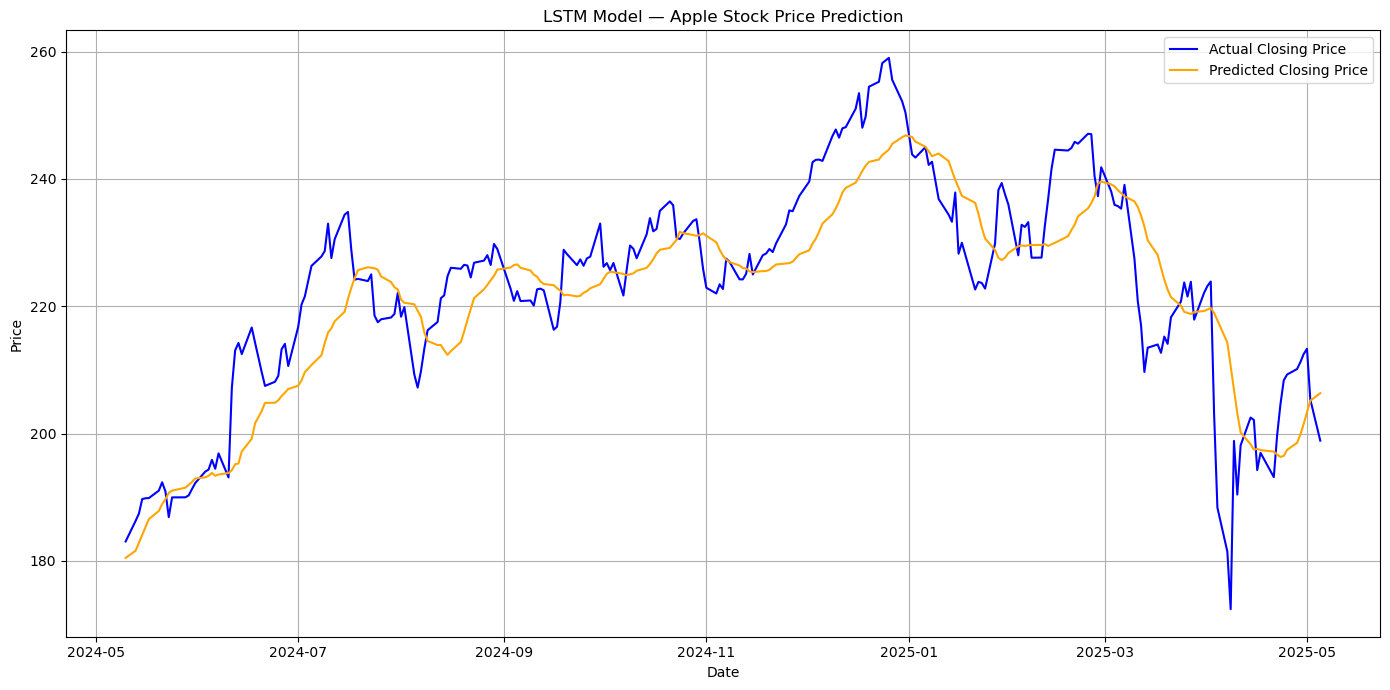

In [34]:
import matplotlib.pyplot as plt

# Get test dates (aligned with validation set)
test_dates = df['date'][window_size + split_index:]

plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual_close, label='Actual Closing Price', color='blue')
plt.plot(test_dates, predicted_close, label='Predicted Closing Price', color='orange')
plt.title("LSTM Model — Apple Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

StatementMeta(model, 3, 35, Finished, Available, Finished)

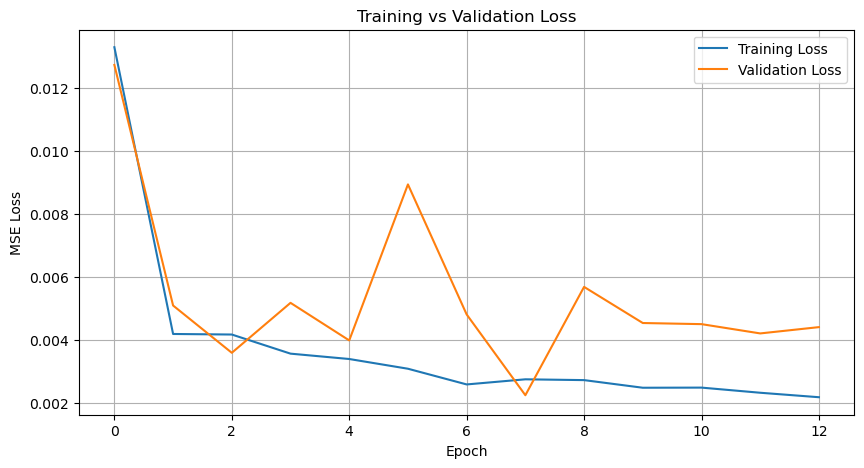

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Define only the numeric columns used during model training
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment_news', 'sentiment_reviews', 'sentiment_search']

# Select only those from the DataFrame
features = df[feature_columns].astype(float).values  # <-- Ensures no timestamps

# Fit or reuse your scaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)  # Or use scaler.transform(features) if already fitted

# Define window size again if needed
window_size = 30

# Use last 30 days to predict the next
last_window = scaled_features[-window_size:]
input_data = np.expand_dims(last_window, axis=0)

predicted_scaled_close = model.predict(input_data)

temp_array = np.zeros((1, scaled_features.shape[1]))
temp_array[0, ] = predicted_scaled_close  

predicted_close_may6 = scaler.inverse_transform(temp_array)[0, 3]
print(f"📈 Predicted Closing Price for May 6, 2025: ${predicted_close_may6:.2f}")

StatementMeta(model, 3, 37, Finished, Available, Finished)

1/1 [==============================] - 0s 43ms/step
📈 Predicted Closing Price for May 6, 2025: $206.95


StatementMeta(model, 3, 38, Finished, Available, Finished)

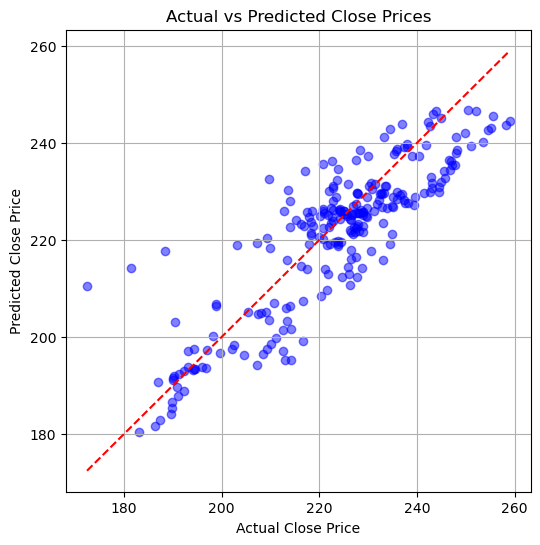

In [38]:
plt.figure(figsize=(6, 6))
plt.scatter(actual_close, predicted_close, alpha=0.5, color='blue')
plt.plot([min(actual_close), max(actual_close)],
         [min(actual_close), max(actual_close)], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.grid(True)
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(actual_close, predicted_close)
r2 = r2_score(actual_close, predicted_close)

print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

StatementMeta(model, 3, 39, Finished, Available, Finished)

MAE: 6.7632
R² Score: 0.7218


StatementMeta(model, 3, 40, Finished, Available, Finished)

             Close        Volume         Open         High          Low  \
count  1257.000000  1.257000e+03  1257.000000  1257.000000  1257.000000   
mean    164.261200  8.202037e+07   164.093826   165.948730   162.383057   
std      38.770657  4.234276e+07    38.690346    38.975010    38.472672   
min      74.389999  2.323471e+07    73.764999    75.250000    73.614998   
25%     136.759995  5.300395e+07   136.600006   138.020004   134.589996   
50%     162.509995  7.137965e+07   161.839996   164.514999   159.779999   
75%     187.679993  9.766490e+07   187.509995   189.250000   185.839996   
max     259.019989  3.742955e+08   258.190002   260.100006   257.630005   

              Year        Month  
count  1257.000000  1257.000000  
mean   2022.332538     6.554495  
std       1.492817     3.429048  
min    2020.000000     1.000000  
25%    2021.000000     4.000000  
50%    2022.000000     7.000000  
75%    2024.000000    10.000000  
max    2025.000000    12.000000  


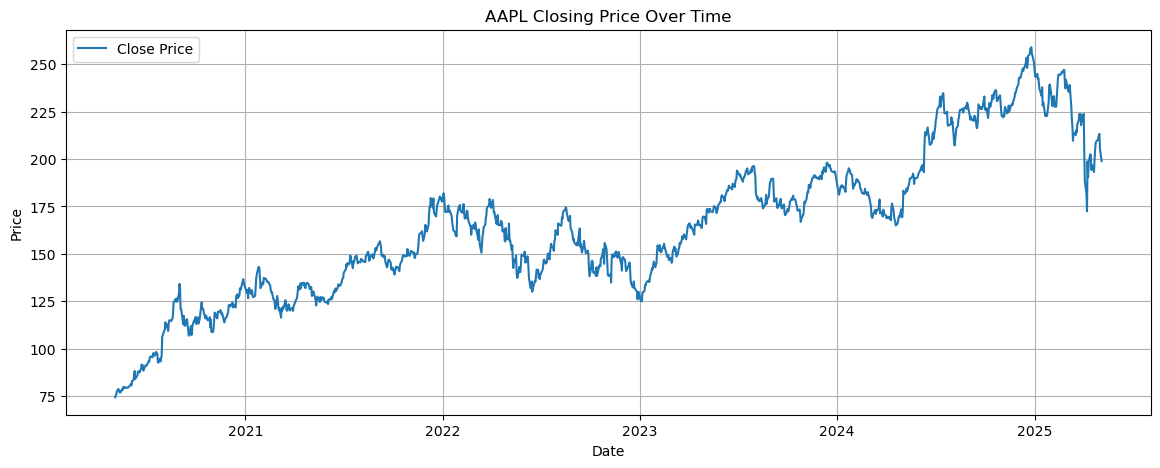

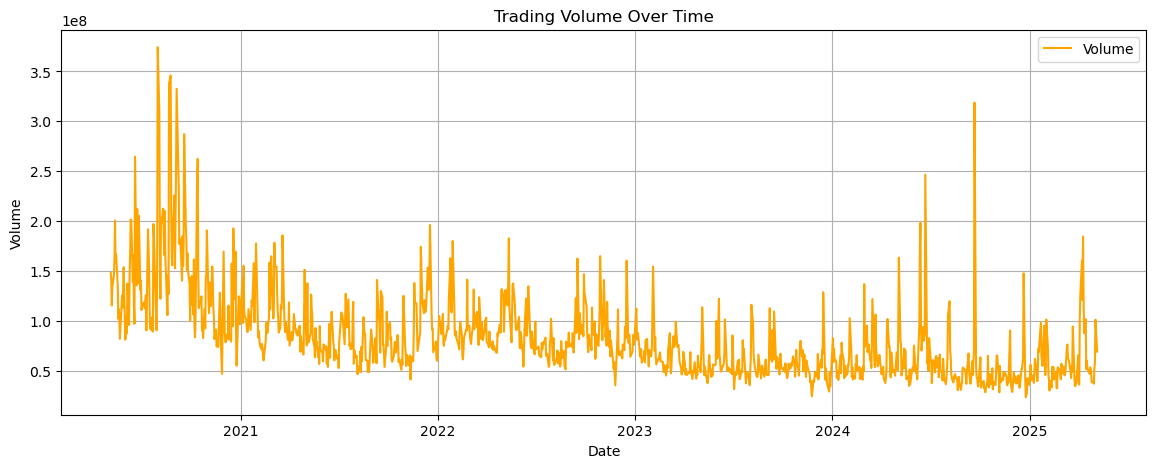

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
print(df_h.describe())

# Closing price trend
plt.figure(figsize=(14, 5))
plt.plot(df_h['date'], df_h['Close'], label='Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Volume trend
plt.figure(figsize=(14, 5))
plt.plot(df_h['date'], df_h['Volume'], label='Volume', color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

StatementMeta(model, 3, 41, Finished, Available, Finished)

/tmp/ipykernel_6641/676801813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_n, x='sentiment', palette='viridis')


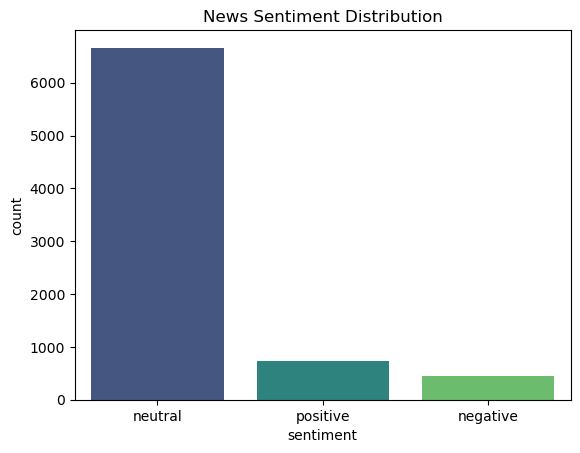

/tmp/ipykernel_6641/676801813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_t, x='sentiment', palette='cool')


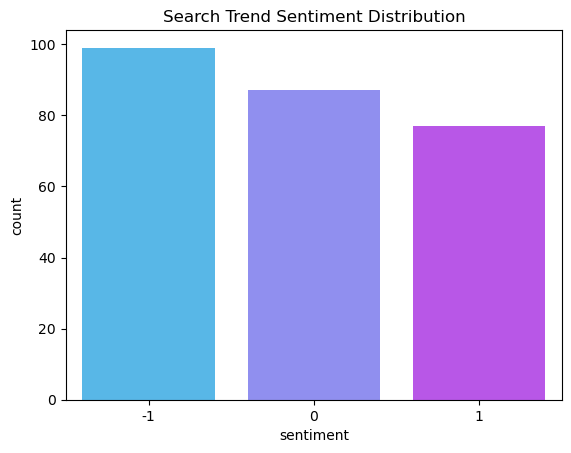

/tmp/ipykernel_6641/676801813.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_reviews', palette='Set2')


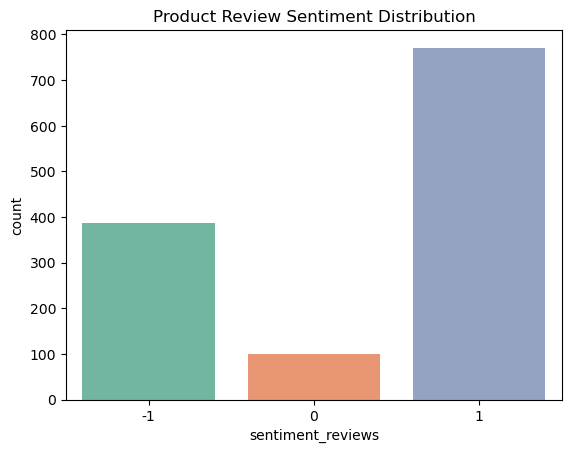

In [41]:
# Sentiment distribution
sns.countplot(data=df_n, x='sentiment', palette='viridis')
plt.title('News Sentiment Distribution')
plt.show()

# Sentiment distribution
sns.countplot(data=df_t, x='sentiment', palette='cool')
plt.title('Search Trend Sentiment Distribution')
plt.show()

# Sentiment distribution
sns.countplot(data=df, x='sentiment_reviews', palette='Set2')
plt.title('Product Review Sentiment Distribution')
plt.show()

In [42]:
# Now you can create the LSTM results DataFrame
lstm_results = pd.DataFrame({
    'date': test_dates,
    'actual_close': actual_close,
    'predicted_close': predicted_close
})

lstm_results.head(20)

StatementMeta(model, 3, 42, Finished, Available, Finished)

,date,actual_close,predicted_close
1011,2024-05-10,183.050003,180.469881
1012,2024-05-13,186.279999,181.601153
1013,2024-05-14,187.429993,182.841120
1014,2024-05-15,189.720001,184.090968
1015,2024-05-16,189.839996,185.310895
1016,2024-05-17,189.869995,186.569823
1017,2024-05-20,191.039993,187.843805
1018,2024-05-21,192.350006,188.911788
1019,2024-05-22,190.899994,189.703881
1020,2024-05-23,186.880005,190.684464


In [43]:
import pyarrow as pa
import pyarrow.parquet as pq

# 1. Convert pandas DataFrame to Parquet format in memory
buffer = BytesIO()
table = pa.Table.from_pandas(lstm_results)
pq.write_table(table, buffer)
buffer.seek(0)  # Reset buffer position

# 2. Define the path within your Gold layer in the container
filename = "Gold/lstm_pred.parquet"

# 3. Initialize BlobServiceClient
connection_string = os.getenv("AZURE_STORAGE_CONNECTION_STRING")
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container="team5container", blob=filename)

# 4. Upload Parquet file to Blob Storage
blob_client.upload_blob(buffer, overwrite=True)
print(f"File uploaded successfully to Blob Storage: {filename}")

StatementMeta(model, 3, 43, Finished, Available, Finished)

File uploaded successfully to Blob Storage: Gold/lstm_pred.parquet


In [44]:
import pyarrow as pa
import pyarrow.parquet as pq

# 1. Convert pandas DataFrame to Parquet format in memory
buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, buffer)
buffer.seek(0)  # Reset buffer position

# 2. Define the path within your Gold layer in the container
filename = "Gold/stock_sentiment_data.parquet"

# 3. Initialize BlobServiceClient
connection_string = os.getenv("AZURE_STORAGE_CONNECTION_STRING")
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container="team5container", blob=filename)

# 4. Upload Parquet file to Blob Storage
blob_client.upload_blob(buffer, overwrite=True)
print(f"File uploaded successfully to Blob Storage: {filename}")

StatementMeta(model, 3, 44, Finished, Available, Finished)

File uploaded successfully to Blob Storage: Gold/stock_sentiment_data.parquet
